In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns

In [2]:
base_dir = "/n/holylabs/LABS/sitanc_lab/Users/mfli/critical-windows-lm/results/LikelihoodAligned/LikelihoodAligned_m1=meta-llama-Llama-3.1-8B-Instruct_m2=grimjim-Llama-3.1-8B-Instruct-abliterated_via_adapter_dataset=Mechanistic-Anomaly-Detection-llama3-jailbreaks/"
splits=['benign_instructions_train',
        'circuit_breakers_train',
        'harmful_autodan',
        'harmful_gcg',
        'harmful_human_mt',
        'harmful_instructions_train',
        'harmful_misc',
        'harmful_pair',
        'harmful_prefill',
        'mt_bench',
        'or_bench_train',
        'xstest'
]

In [3]:
aligned_data = {}
unaligned_data = {}

for split in splits:
    aligned_data[split]     = torch.load(f"{base_dir}/split={split}/aligned_losses.pt")
    unaligned_data[split] = torch.load(f"{base_dir}/split={split}/unaligned_losses.pt")

/tmp/ipykernel_1541930/2936164846.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  aligned_data[split]     = torch.load(f"{base_dir}/split={split}/aligned_losses.pt")
/tm

In [12]:
differences.float().tolist()

[0.0,
 0.0625,
 -0.0234375,
 0.015625,
 0.0078125,
 -0.01953125,
 0.046875,
 -0.015625,
 0.109375,
 0.0234375,
 -0.0078125,
 -0.0390625,
 -0.015625,
 0.0,
 -0.03125,
 -0.0234375,
 -0.0234375,
 0.0078125,
 0.03125,
 -0.015625,
 0.0,
 0.0,
 0.078125,
 -0.05859375,
 0.0078125,
 0.28125,
 0.046875,
 -0.03515625,
 0.015625,
 -0.0078125,
 0.0,
 0.0078125,
 -0.125,
 -0.03125,
 0.0078125,
 -0.02734375,
 0.078125,
 0.03515625,
 0.0,
 0.21875,
 0.25,
 0.0,
 0.0,
 -0.01953125,
 0.0078125,
 0.0078125,
 -0.01953125,
 0.0078125,
 0.0078125,
 0.0,
 0.03125,
 -0.0234375,
 0.0234375,
 0.0234375,
 0.0625,
 -0.0390625,
 0.0234375,
 0.046875,
 0.03125,
 -0.0078125,
 0.03125,
 0.0,
 0.015625,
 -0.02734375,
 0.03125,
 0.0546875,
 0.00390625,
 -0.0234375,
 -0.0078125,
 0.01953125,
 0.015625,
 0.02734375,
 -0.015625,
 0.0625,
 0.15625,
 0.0,
 0.0625,
 -0.0078125,
 0.0078125,
 -0.015625,
 -0.04296875,
 -0.0546875,
 0.015625,
 0.0,
 -0.015625,
 0.0234375,
 0.171875,
 -0.0546875,
 0.0390625,
 0.0078125,
 -0.0234

In [14]:
len(aligned_data['harmful_instructions_train'])

2955

/tmp/ipykernel_1541930/2441661438.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  diffs['Difference'].extend(list(np.array(differences.float())))


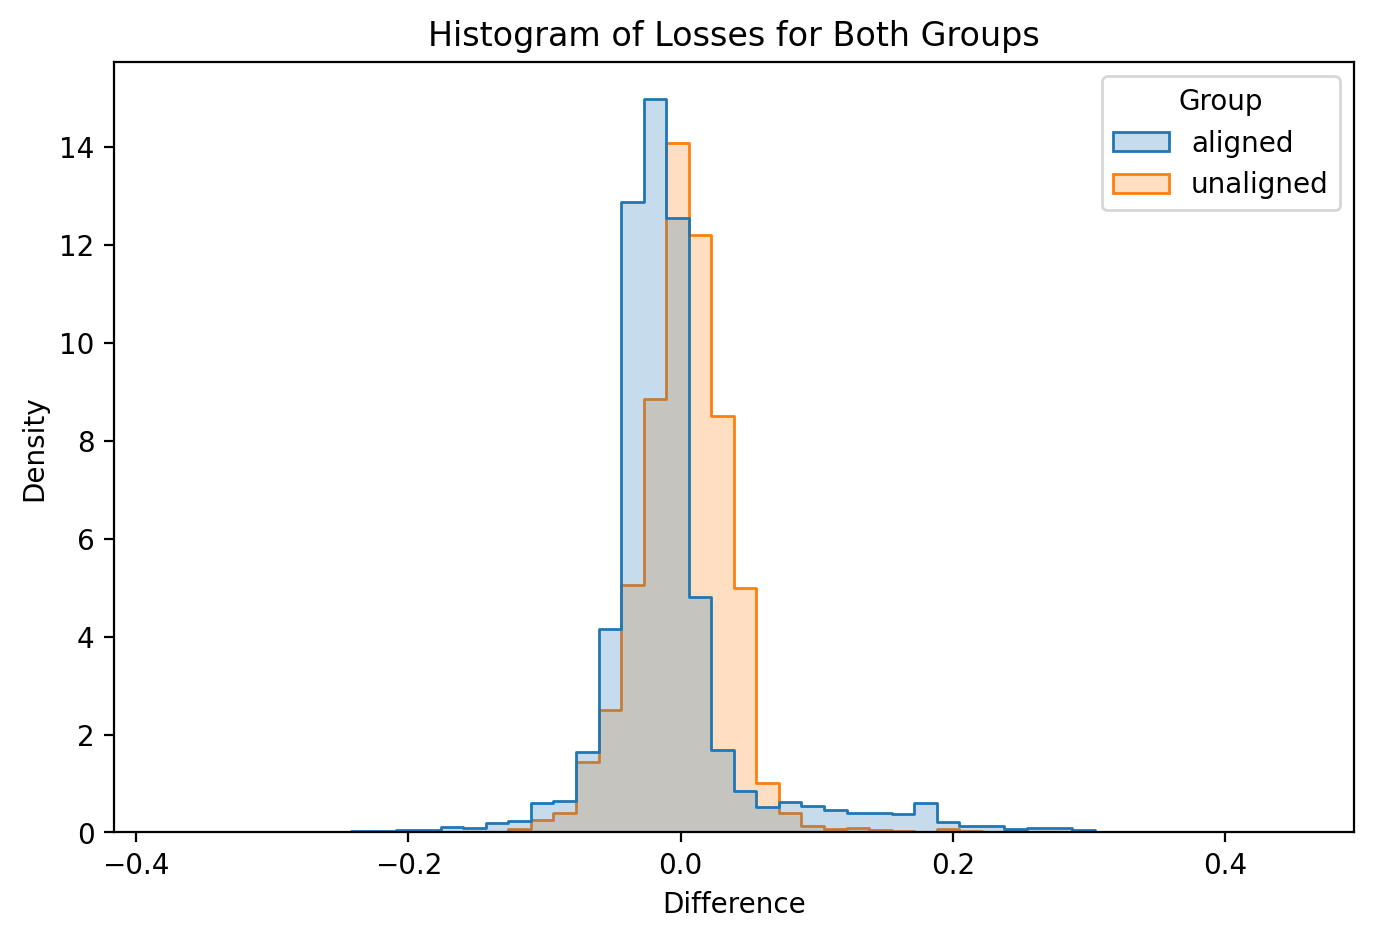

In [31]:
# Prepare the data
aligned_gp =[ 'benign_instructions_train','harmful_instructions_train',
              'mt_bench','or_bench_train','xstest'
              ]
unaligned_gp = ['circuit_breakers_train','harmful_gcg','harmful_human_mt',
                'harmful_misc','harmful_pair','harmful_prefill']

diffs = {'Group': [], 'Difference': []}
for group, group_name in zip([aligned_gp, unaligned_gp], ['aligned', 'unaligned']):
    for split in group:
        differences = aligned_data[split] - unaligned_data[split]
        diffs['Group'].extend([group_name] * len(differences))
        diffs['Difference'].extend(list(np.array(differences.float())))

# Convert to a DataFrame for Seaborn
diffs_df = pd.DataFrame(diffs)

# Plot using Seaborn
plt.figure(figsize=(8, 5),dpi=200)
sns.histplot(data=diffs_df, x='Difference', hue='Group', bins=50, element="step", stat="density", common_norm=False)

plt.title('Histogram of Losses for Both Groups')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [24]:
t_stat, p_value = ttest_ind(diffs_df.Difference[diffs_df.Group=="aligned"], 
                            diffs_df.Difference[diffs_df.Group=="unaligned"])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -11.267073171659792
P-value: 2.297534038376977e-29


In [33]:
display(diffs_df.sample(5))
display(diffs_df.groupby("Group")["Difference"].agg(["mean","std","sem"]))

,Group,Difference
7896,aligned,-0.050781
8876,aligned,-0.042969
20260,unaligned,0.031250
11595,aligned,0.046875
20495,unaligned,0.031250


,mean,std,sem
Group,,,
aligned,-0.008092,0.055017,0.000410
unaligned,0.002194,0.033383,0.000533


In [64]:
diffs_df["qcut_diff"]= pd.qcut(diffs_df.Difference, 5)
diffs_df["qcut_diff"]

0          (-0.376, -0.0352]
1        (-0.0195, -0.00781]
2        (-0.0195, -0.00781]
3         (-0.0352, -0.0195]
4         (-0.0352, -0.0195]
                ...         
21944        (0.0117, 0.453]
21945    (-0.0195, -0.00781]
21946     (-0.00781, 0.0117]
21947        (0.0117, 0.453]
21948    (-0.0195, -0.00781]
Name: qcut_diff, Length: 21949, dtype: category
Categories (5, interval[float64, right]): [(-0.376, -0.0352] < (-0.0352, -0.0195] < (-0.0195, -0.00781] < (-0.00781, 0.0117] < (0.0117, 0.453]]

/tmp/ipykernel_1541930/3143794235.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = diffs_df.groupby(["qcut_diff", "Group"]).size().unstack()


<Figure size 2500x1500 with 0 Axes>

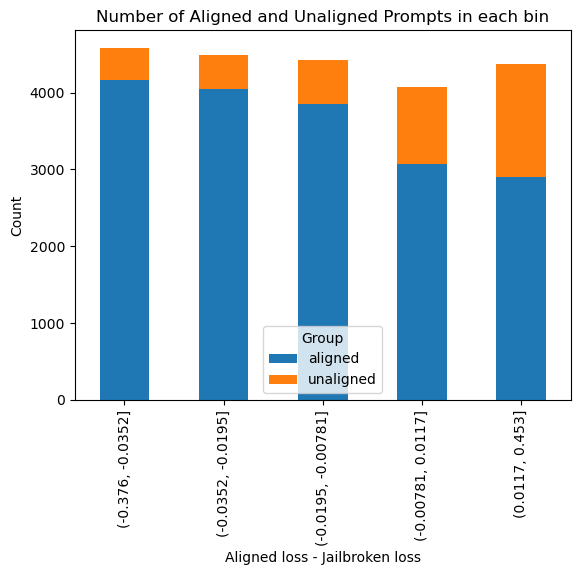

In [65]:
grouped = diffs_df.groupby(["qcut_diff", "Group"]).size().unstack()
plt.figure(figsize=(5, 3),dpi=500)
grouped.plot(kind='bar', stacked=True)
plt.title('Number of Aligned and Unaligned Prompts in each bin')
plt.xlabel('Aligned loss - Jailbroken loss')
plt.ylabel('Count')
plt.show()


In [ ]:

grouped = diffs_df.groupby(["qcut_diff", "Group"]).size().unstack()
grouped["percent_unaligned"]=grouped["unaligned"]/grouped.sum(axis=1)
grouped


/tmp/ipykernel_1541930/3091452663.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = diffs_df.groupby(["qcut_diff", "Group"]).size().unstack()


Group,aligned,unaligned,percent_unaligned
qcut_diff,,,
"(-0.376, -0.0352]",4164,419,0.091425
"(-0.0352, -0.0195]",4044,450,0.100134
"(-0.0195, -0.00781]",3850,581,0.131122
"(-0.00781, 0.0117]",3071,1001,0.245825
"(0.0117, 0.453]",2897,1472,0.336919


## Why are the number of differences similar

Just a casting issue to bfloat16. If this continues to be a problem once I have rerun stuff this may be a bug

In [66]:
## Why are they the same
print(len(diffs_df.Difference))
print(len(diffs_df.Difference.unique()))

21949
104


In [71]:
print(len((aligned_data['harmful_instructions_train']-unaligned_data['harmful_instructions_train'])))
print(len((aligned_data['harmful_instructions_train']-unaligned_data['harmful_instructions_train']).unique()))

2955
55


In [76]:
aligned_data['harmful_instructions_train'][:100]

tensor([2.6719, 3.2344, 2.7656, 3.0469, 3.1875, 3.2344, 2.7656, 2.4844, 3.0469,
        2.6562, 3.1719, 2.4375, 2.9375, 2.5156, 2.9844, 3.6250, 2.7969, 2.7031,
        2.6094, 2.6719, 2.6250, 2.4219, 2.0312, 2.2031, 2.5469, 2.0938, 2.8125,
        3.0000, 2.0938, 2.4062, 2.6406, 2.8906, 2.4219, 2.8750, 2.5938, 2.9688,
        2.4844, 2.8281, 2.2344, 3.0156, 2.9375, 2.9844, 3.5469, 3.0469, 2.8906,
        2.2500, 2.5000, 2.5469, 2.7188, 2.3906, 2.8750, 2.9375, 2.4844, 2.6562,
        2.9219, 2.1250, 3.0156, 2.5000, 2.8281, 2.6562, 2.5156, 2.9844, 2.6719,
        3.0000, 2.5156, 3.0469, 2.9062, 2.6875, 3.0000, 2.7344, 2.5625, 2.7500,
        2.7969, 3.3125, 2.7188, 2.5469, 2.2812, 2.4688, 2.3594, 3.4688, 3.2188,
        2.2188, 2.9375, 2.5469, 2.2812, 3.0781, 3.4688, 2.8125, 2.6250, 2.5156,
        2.6562, 2.3594, 2.8906, 2.5781, 3.0625, 2.3281, 2.9375, 3.0469, 2.8438,
        2.7812], dtype=torch.bfloat16)

In [73]:
print(len((aligned_data['harmful_instructions_train']).unique()))

141


In [74]:
print(len((unaligned_data['harmful_instructions_train']).unique()))

142


In [69]:
len(aligned_data['harmful_instructions_train'])

2955